# Genetic Algorithms

Dis notebook na part of [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners).


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## Some Theory

**Genetic Algorithms** (GA) na method wey dey use **evolutionary approach** for AI, wey dey take how population dey evolve to find better solution for one problem. Na [John Henry Holland](https://en.wikipedia.org/wiki/John_Henry_Holland) bring am come in 1975.

Genetic Algorithms dey base on dis ideas:
* Correct solutions for di problem fit dey represent as **genes**
* **Crossover** go help us join two solutions together to get new correct solution
* **Selection** dey help us choose di better solutions using one **fitness function**
* **Mutations** dey add small change to scatter di optimization so we fit comot from di local minimum 

If you wan do Genetic Algorithm, you go need dis things:

 * Find way to code di problem solutions using **genes** $g\in\Gamma$
 * For di set of genes $\Gamma$, you go need to define **fitness function** $\mathrm{fit}: \Gamma\to\mathbb{R}$. Di smaller di function value, di better di solution.
 * Define **crossover** method to join two genes together to get new correct solution $\mathrm{crossover}: \Gamma^2\to\Gamma$.
 * Define **mutation** method $\mathrm{mutate}: \Gamma\to\Gamma$.
Most times, crossover and mutation na simple algorithms wey dey manipulate genes as number sequence or bit vectors.

How you go take do genetic algorithm fit change from one case to another, but di general way na dis:

1. Choose initial population $G\subset\Gamma$
2. Randomly choose one operation wey you go do for dis step: crossover or mutation 
3. **Crossover**:
  * Randomly choose two genes $g_1, g_2 \in G$
  * Calculate crossover $g=\mathrm{crossover}(g_1,g_2)$
  * If $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ or $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - replace di gene for di population with $g$.
4. **Mutation** - choose random gene $g\in G$ and replace am with $\mathrm{mutate}(g)$
5. Repeat from step 2, until we get di value of $\mathrm{fit}$ wey small well, or until di number of steps wey we fit do don finish.

Di kind tasks wey GA dey solve:
1. Schedule optimization
1. Better packing
1. Better cutting
1. Make exhaustive search fast


## Problem 1: How to Share Treasure Fairly

**Wetin dem wan do**:  
Two people find treasure wey get diamonds wey get different sizes (and different price). Dem wan share di treasure into two parts so di difference for di price go be 0 (or e go small well well).

**Di proper explanation**:  
We get one set of numbers $S$. We need to share am into two subsets $S_1$ and $S_2$, so dat $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ and $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

First, make we define di set $S$:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

Make we encode each possible solution of di problem wit binary vector $B\in\{0,1\}^N$, wey di number wey dey $i$-th position go show which set ($S_1$ or $S_2$) di $i$-th number for di original set $S$ belong. `generate` function go generate those random binary vectors.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


Make we now define `fit` function wey go calculate di "cost" of di solution. E go be di difference between di sum of two sets, $S_1$ and $S_2$:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

Now we go need define functions for mutation and crossover:  
* For mutation, we go pick one random bit and change am (turn 0 to 1 and vice versa)  
* For crossover, we go take some bits from one vector, and some bits from another one. We go use the same `generate` function to randomly pick which bits to take from which of the input masks.  


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

Make we create initial population of di solutions $P$ wey get size `pop_size`:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

Now, di main function wey go do di evolution. `n` na di number of steps wey di evolution go take. For each step:  
* With 30% chance, we go do mutation, and replace di element wey get di worst `fit` function wit di mutated element  
* With 70% chance, we go do crossover  

Di function go return di best solution (gene wey match di best solution), and di history of di smallest fit function for di population for each iteration.


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


You fit function wey we dey use don reduce well well! Dis na di graph wey show how di `fit` function for di whole population dey behave during di process.


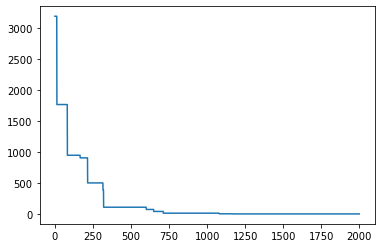

In [10]:
plt.plot(hist)
plt.show()

## Problem 2: N Queens Problem

**Task**:
You go need put $N$ queens for chess board wey get size $N\times N$ so dem no go fit attack each oda.

First, make we solve di problem without genetic algorithms, use full search. We fit take di state of di board represent am wit di list $L$, wey di $i$-th number for di list go be di horizontal position of di queen for di $i$-th row. E dey clear say each solution go get only one queen for each row, and each row go get one queen.

Our goal na to find di first solution to di problem, after dat we go stop di search. You fit easily change dis function to fit generate all di possible positions for queens.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Make we solve dis same problem wit genetic algorithm. Dis solution na from [dis blog post](https://kushalvyas.github.io/gen_8Q.html).

We go use di same list wey get length $N$ to represent each solution, and as `fit` function, we go count di number of queens wey dey attack each oda:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

Bikos say to calculate fitness function dey take time, make we store each solution for di population wit di value of di fitness function. Make we generate di initial population:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

Now we need to define mutation and crossover functions. Crossover go join two genes together by breaking dem for one random point and join two parts from different genes together.


In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

We go improve di gene selection process by choosing more genes wey get better fitness function. Di chance to select one gene go depend on di fitness function:


In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

Make we define di main evolutionary loop now. We go make di logic small different from di example wey we do before, to show say person fit dey creative. We go dey loop until we get di perfect solution (fitness function=0), and for each step, we go carry di current generation, come produce new generation wey get di same size. We go use `nxgeneration` function do am, follow dis steps:

1. Commot di solutions wey no fit well - `discard_unfit` function dey do dis one.
2. Add some random solutions join di generation.
3. Create new generation wey get size `gen_size` by following dis steps for each new gene:
   - Pick two random genes, with chance wey match di fitness function.
   - Calculate crossover.
   - Apply mutation with di chance `mutation_prob`.


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

E dey interestin say most times we fit get solution quick-quick, but for some rare cases, optimization go reach local minimum, and di process go dey stuck for long time. E dey important make you put dis one for mind wen you dey measure average time: even though for most cases genetic algorithm go fast pass full search, for some cases e fit take longer. To solve dis problem, e dey make sense to limit di number of generations wey you go consider, and if we no fit find di solution - we fit start again from scratch.


In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**Disclaimer**:  
Dis dokyument don use AI transleto service [Co-op Translator](https://github.com/Azure/co-op-translator) do di translation. Even as we dey try make am correct, abeg sabi say machine translation fit get mistake or no dey accurate well. Di original dokyument wey dey for im native language na di main source wey you go trust. For important mata, e good make professional human transleto check am. We no go fit take blame for any misunderstanding or wrong interpretation wey fit happen because you use dis translation.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
